In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import numpy as np
import requests
import json
import time
import gmaps
from ipywidgets.embed import embed_minimal_html


In [4]:
csv_path = "Health_Factors.csv"
HF_df = pd.read_csv(csv_path)

HF_df.head()

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School
0,Alabama,1089,Madison,372909,77.702932,48620,68609,326.0,4714,227198
1,Alabama,1091,Marengo,18863,72.314521,3920,38838,9.0,271,10974
2,Alabama,1085,Lowndes,9726,71.150811,2400,33930,1.0,204,5533
3,Alabama,1087,Macon,18068,72.837683,3850,34281,7.0,337,9843
4,Alabama,1097,Mobile,413210,75.234643,69830,49492,274.0,7024,241102


In [5]:
#Review Data
HF_df.count()

State                        1422
FIPS                         1422
County                       1358
Population                   1422
Life Expectancy              1403
# Food Insecure              1422
Median Household Income      1422
# Primary Care Physicians    1355
# Unemployed                 1422
# Completed High School      1422
dtype: int64

In [6]:
#Remove N/A's from DF
clean_HF_df = HF_df.dropna(how="any")
#View column counts
clean_HF_df.count()

State                        1273
FIPS                         1273
County                       1273
Population                   1273
Life Expectancy              1273
# Food Insecure              1273
Median Household Income      1273
# Primary Care Physicians    1273
# Unemployed                 1273
# Completed High School      1273
dtype: int64

# TEXAS Data

In [7]:
#Create a DataFrame of all Texas Counties
Texas1_HF = clean_HF_df.loc[clean_HF_df["State"] == "Texas"]                        
Texas1_HF.head()

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School
980,Texas,48339,Montgomery,607391,79.666573,69390,88833,353.0,9659,327594
981,Texas,48337,Montague,19818,74.436613,3190,53649,6.0,265,11685
982,Texas,48335,Mitchell,8545,75.727868,1130,44457,4.0,82,4385
983,Texas,48341,Moore,20940,77.756567,2740,55099,10.0,255,8393
984,Texas,48347,Nacogdoches,65204,76.982722,12430,46207,46.0,1057,31213


In [8]:
#Calculate Percentage Columns of Texas Data Frame (Texas1_HF)

calc_TX_DF = pd.DataFrame(Texas1_HF)
calc_TX_DF["% Food Insecure"] = Texas1_HF["# Food Insecure"]/Texas1_HF["Population"]
calc_TX_DF["Physicians Per 100k Population"] = Texas1_HF["# Primary Care Physicians"]/(Texas1_HF["Population"]/[100000])
calc_TX_DF["% Primary Care Physicians"] = Texas1_HF["# Primary Care Physicians"]/Texas1_HF["Population"]
calc_TX_DF["% Unemployed"] = Texas1_HF["# Unemployed"]/Texas1_HF["Population"]
calc_TX_DF["% Completed High School"] = Texas1_HF["# Completed High School"]/Texas1_HF["Population"]

In [9]:
calc_TX_DF.head()

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School
980,Texas,48339,Montgomery,607391,79.666573,69390,88833,353.0,9659,327594,0.114243,58.117424,0.000581,0.015902,0.539346
981,Texas,48337,Montague,19818,74.436613,3190,53649,6.0,265,11685,0.160965,30.275507,0.000303,0.013372,0.589616
982,Texas,48335,Mitchell,8545,75.727868,1130,44457,4.0,82,4385,0.132241,46.811001,0.000468,0.009596,0.513166
983,Texas,48341,Moore,20940,77.756567,2740,55099,10.0,255,8393,0.130850,47.755492,0.000478,0.012178,0.400812
984,Texas,48347,Nacogdoches,65204,76.982722,12430,46207,46.0,1057,31213,0.190632,70.547819,0.000705,0.016211,0.478698


# TEXAS Data (Only Counties > 10,000 pop)

In [10]:
#Create a DataFrame that filters all Texas Counties down to just those with a population > 10,000
#Small Counties may skew the life expectancy data so we filtered by 10,000 to compare the regular data to the filtered dataframe
Texas_HF = Texas1_HF.loc[Texas1_HF["Population"] > 10000]                          
Texas_HF.head()

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School
980,Texas,48339,Montgomery,607391,79.666573,69390,88833,353.0,9659,327594,0.114243,58.117424,0.000581,0.015902,0.539346
981,Texas,48337,Montague,19818,74.436613,3190,53649,6.0,265,11685,0.160965,30.275507,0.000303,0.013372,0.589616
983,Texas,48341,Moore,20940,77.756567,2740,55099,10.0,255,8393,0.130850,47.755492,0.000478,0.012178,0.400812
984,Texas,48347,Nacogdoches,65204,76.982722,12430,46207,46.0,1057,31213,0.190632,70.547819,0.000705,0.016211,0.478698
986,Texas,48343,Morris,12388,74.251578,2320,43304,2.0,256,7616,0.187278,16.144656,0.000161,0.020665,0.614789


In [11]:
#Calculate Percentage Columns of Filtered Data Frame (Texas_HF)

Final_DF = pd.DataFrame(Texas_HF)
Final_DF["% Food Insecure"] = Texas_HF["# Food Insecure"]/Texas_HF["Population"]
Final_DF["Physicians Per 100k Population"] = Texas_HF["# Primary Care Physicians"]/(Texas_HF["Population"]/[100000])
Final_DF["% Primary Care Physicians"] = Texas_HF["# Primary Care Physicians"]/Texas_HF["Population"]
Final_DF["% Unemployed"] = Texas_HF["# Unemployed"]/Texas_HF["Population"]
Final_DF["% Completed High School"] = Texas_HF["# Completed High School"]/Texas_HF["Population"]
Final_DF["County Parameter"] = Texas_HF["County"] + " County, " + Texas_HF["State"]

In [12]:
Final_DF.head()

,State,FIPS,County,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School,County Parameter
980,Texas,48339,Montgomery,607391,79.666573,69390,88833,353.0,9659,327594,0.114243,58.117424,0.000581,0.015902,0.539346,"Montgomery County, Texas"
981,Texas,48337,Montague,19818,74.436613,3190,53649,6.0,265,11685,0.160965,30.275507,0.000303,0.013372,0.589616,"Montague County, Texas"
983,Texas,48341,Moore,20940,77.756567,2740,55099,10.0,255,8393,0.130850,47.755492,0.000478,0.012178,0.400812,"Moore County, Texas"
984,Texas,48347,Nacogdoches,65204,76.982722,12430,46207,46.0,1057,31213,0.190632,70.547819,0.000705,0.016211,0.478698,"Nacogdoches County, Texas"
986,Texas,48343,Morris,12388,74.251578,2320,43304,2.0,256,7616,0.187278,16.144656,0.000161,0.020665,0.614789,"Morris County, Texas"


# Scatter Plots w. Linear Regression  (Only Counties > 10,000 pop)

The correlation between both factors is -0.12
The r-squared is: 0.014554276620625875


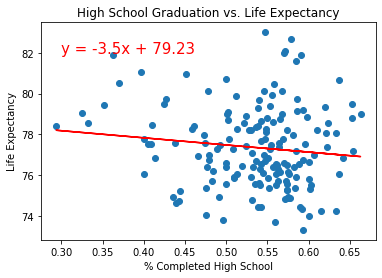

In [14]:
# High School Graduation Percentage
# Create the plot and Add the linear regression equation and line
x_values = Final_DF["% Completed High School"]
y_values = Final_DF["Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.3,82),fontsize=15,color="red")
plt.xlabel("% Completed High School")
plt.ylabel("Life Expectancy")
plt.title("High School Graduation vs. Life Expectancy")
#plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("High School Grad % vs. Life Expectancy.png")

The correlation between both factors is 0.54
The r-squared is: 0.2874351210557872


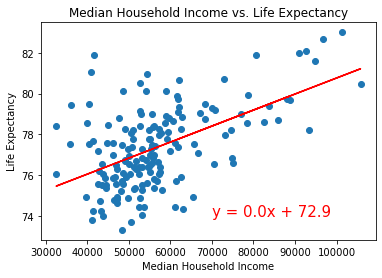

In [15]:
# Median Household Income
# Create the plot and Add the linear regression equation and line
x_values = Final_DF["Median Household Income"]
y_values = Final_DF["Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70000,74),fontsize=15,color="red")
plt.xlabel("Median Household Income")
plt.ylabel("Life Expectancy")
plt.title("Median Household Income vs. Life Expectancy")
#plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Median Household Income vs. Life Expectancy.png")

The correlation between both factors is -0.5
The r-squared is: 0.25405652478209373


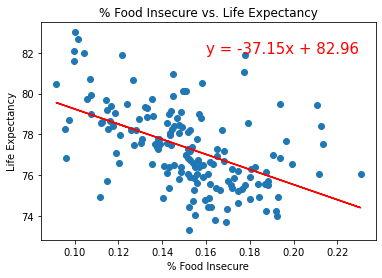

In [16]:
# Food Insecurity %
# Create the plot and Add the linear regression equation and line
x_values = Final_DF["% Food Insecure"]
y_values = Final_DF["Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.16,82),fontsize=15,color="red")
plt.xlabel("% Food Insecure")
plt.ylabel("Life Expectancy")
plt.title("% Food Insecure vs. Life Expectancy")
#plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Food Insecurity % vs. Life Expectancy.png")

The correlation between both factors is -0.04
The r-squared is: 0.0014067011712020666


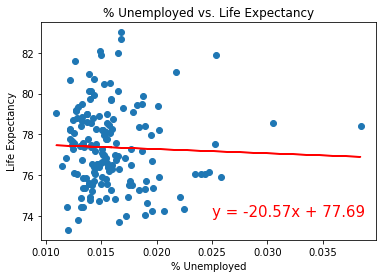

In [17]:
# Unemployment %
# Create the plot and Add the linear regression equation and line
x_values = Final_DF["% Unemployed"]
y_values = Final_DF["Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.025,74),fontsize=15,color="red")
plt.xlabel("% Unemployed")
plt.ylabel("Life Expectancy")
plt.title("% Unemployed vs. Life Expectancy")
#plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Unemployment % vs. Life Expectancy.png")

The correlation between both factors is 0.32
The r-squared is: 0.10205839331048194


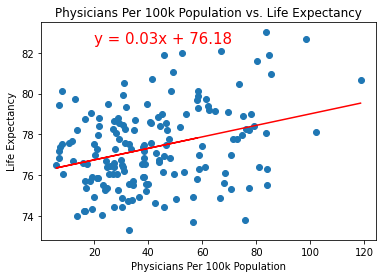

In [18]:
# Physicians Per 100k Population
# Create the plot and Add the linear regression equation and line
x_values = Final_DF["Physicians Per 100k Population"]
y_values = Final_DF["Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,82.5),fontsize=15,color="red")
plt.xlabel("Physicians Per 100k Population")
plt.ylabel("Life Expectancy")
plt.title("Physicians Per 100k Population vs. Life Expectancy")
#plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Physicians Per 100k Population vs. Life Expectancy.png")

# Box Plots

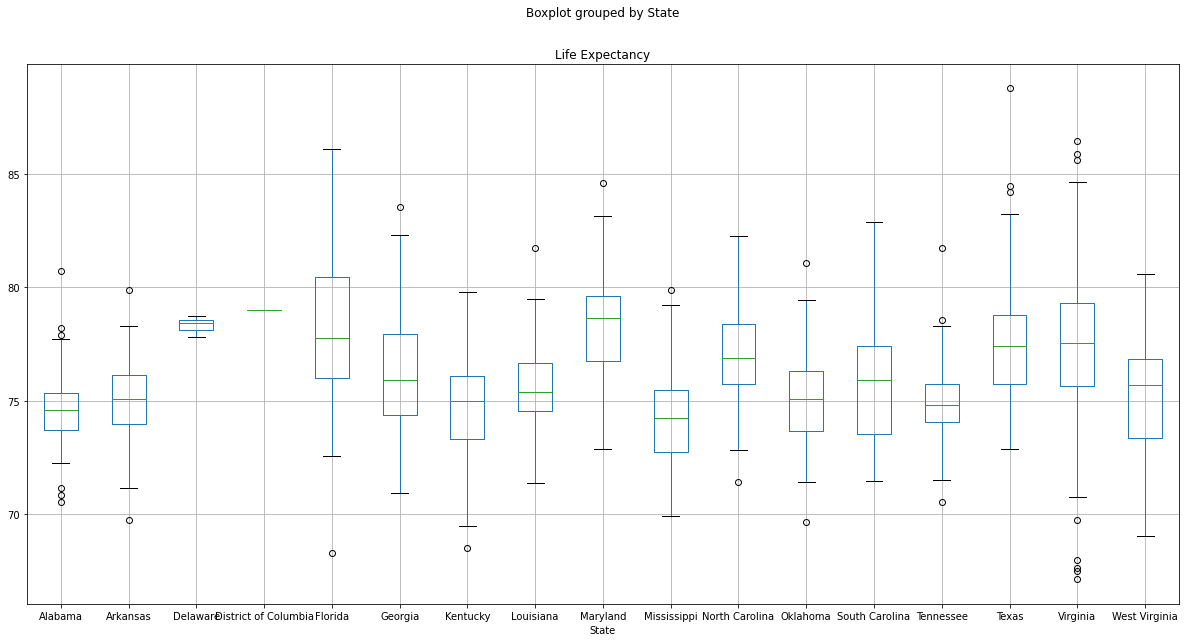

In [19]:
HF_df.boxplot("Life Expectancy", by="State", figsize=(20, 10))
plt.savefig("State Comparison Box Plot.png")

<AxesSubplot:title={'center':'% Unemployed'}, xlabel='State'>

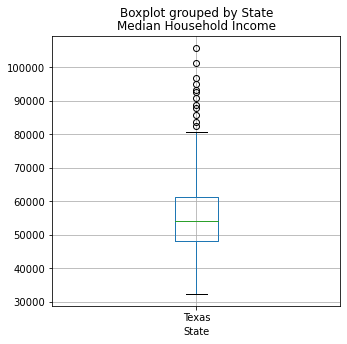

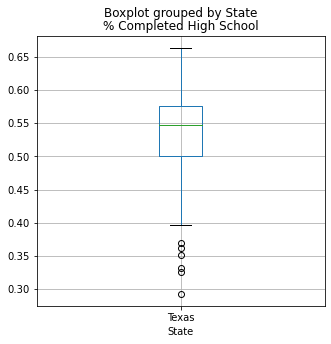

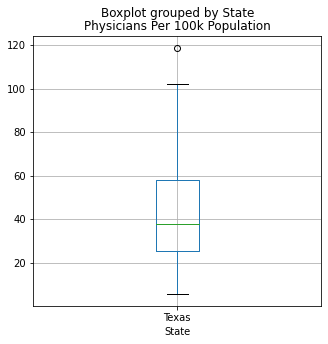

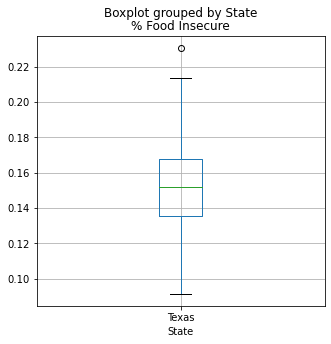

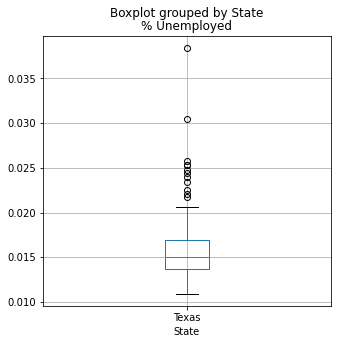

In [20]:
Final_DF.boxplot("Median Household Income", by="State", figsize=(5, 5))

Final_DF.boxplot("% Completed High School", by="State", figsize=(5, 5))

Final_DF.boxplot("Physicians Per 100k Population", by="State", figsize=(5, 5))

Final_DF.boxplot("% Food Insecure", by="State", figsize=(5, 5))

Final_DF.boxplot("% Unemployed", by="State", figsize=(5, 5))

# Top 5 Counties: Life Expectancy

In [21]:
#Find the top 5 counties for Life Expectancy with the unfiltered data frame
top5_unfiltered_DF = calc_TX_DF.nlargest(5, ['Life Expectancy'])
top5_unfiltered_county = top5_unfiltered_DF.set_index('County')
top5_unfiltered_county

,State,FIPS,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School
County,,,,,,,,,,,,,,
Presidio,Texas,48377,6704,88.807774,1550,33499,2.0,202,2356,0.231205,29.832936,0.000298,0.030131,0.351432
Jeff Davis,Texas,48243,2274,84.235972,260,53362,1.0,30,1339,0.114336,43.975374,0.000440,0.013193,0.588830
Sutton,Texas,48435,3776,83.253514,410,63427,4.0,53,1893,0.108581,105.932203,0.001059,0.014036,0.501324
Fort Bend,Texas,48157,811688,83.016215,81310,101361,677.0,13622,444200,0.100174,83.406432,0.000834,0.016782,0.547255
Collin,Texas,48085,1034730,82.675870,105240,96847,1019.0,17358,598877,0.101708,98.479797,0.000985,0.016775,0.578776


In [22]:
#Find the top 5 counties for Life Expectancy with population filtered for > 10,000.... Results in different counties
top5_DF = Final_DF.nlargest(5, ['Life Expectancy'])
top5_county = top5_DF.set_index('County')
top5_county

,State,FIPS,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School,County Parameter
County,,,,,,,,,,,,,,,
Fort Bend,Texas,48157,811688,83.016215,81310,101361,677.0,13622,444200,0.100174,83.406432,0.000834,0.016782,0.547255,"Fort Bend County, Texas"
Collin,Texas,48085,1034730,82.675870,105240,96847,1019.0,17358,598877,0.101708,98.479797,0.000985,0.016775,0.578776,"Collin County, Texas"
Williamson,Texas,48491,590551,82.106826,58830,92661,396.0,8772,337578,0.099619,67.056021,0.000671,0.014854,0.571632,"Williamson County, Texas"
Denton,Texas,48121,887207,82.014735,92570,90910,464.0,14619,506374,0.104339,52.298956,0.000523,0.016478,0.570751,"Denton County, Texas"
Travis,Texas,48453,1273954,81.914037,155240,80690,1078.0,19047,753099,0.121857,84.618440,0.000846,0.014951,0.591151,"Travis County, Texas"


# Bottom 5 Counties: Life Expectancy

In [23]:
#Find the top 5 counties for Life Expectancy with the unfiltered data frame
bottom5_unfiltered_DF = calc_TX_DF.nsmallest(5, ['Life Expectancy'])
bottom5_unfiltered_county = bottom5_unfiltered_DF.set_index('County')
bottom5_unfiltered_county

,State,FIPS,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School
County,,,,,,,,,,,,,,
Anderson,Texas,48001,57735,73.305891,8800,48461,19.0,693,34222,0.152421,32.908981,0.000329,0.012003,0.592743
Winkler,Texas,48495,8010,73.438716,940,64894,2.0,113,3191,0.117353,24.968789,0.000250,0.014107,0.398377
Coleman,Texas,48083,8175,73.488242,1430,44834,5.0,118,5318,0.174924,61.162080,0.000612,0.014434,0.650520
Martin,Texas,48317,5771,73.496549,580,68745,1.0,75,2570,0.100503,17.328019,0.000173,0.012996,0.445330
Polk,Texas,48373,51353,73.709509,8690,50416,29.0,852,28742,0.169221,56.471871,0.000565,0.016591,0.559695


In [24]:
#Find the bottom 5 counties for Life Expectancy with population filtered for > 10,000.... Results in different counties
bottom5_DF = Final_DF.nsmallest(5, ['Life Expectancy'])
bottom5_county = bottom5_DF.set_index('County')
bottom5_county

,State,FIPS,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School,County Parameter
County,,,,,,,,,,,,,,,
Anderson,Texas,48001,57735,73.305891,8800,48461,19.0,693,34222,0.152421,32.908981,0.000329,0.012003,0.592743,"Anderson County, Texas"
Polk,Texas,48373,51353,73.709509,8690,50416,29.0,852,28742,0.169221,56.471871,0.000565,0.016591,0.559695,"Polk County, Texas"
Potter,Texas,48375,117415,73.774648,19280,41138,89.0,1515,58289,0.164204,75.799515,0.000758,0.012903,0.496436,"Potter County, Texas"
Trinity,Texas,48455,14651,73.992110,2820,43788,2.0,253,8799,0.192478,13.650945,0.000137,0.017268,0.600573,"Trinity County, Texas"
Liberty,Texas,48291,88219,74.050169,13680,53274,20.0,1669,41973,0.155069,22.670853,0.000227,0.018919,0.475782,"Liberty County, Texas"


# Top 5 and Bottom 5 Counties DATA FRAME (not filtered for population)

In [25]:
frames_unf = [top5_unfiltered_county, bottom5_unfiltered_county]

top_bottom_5_unf = pd.concat(frames_unf)

top_bottom_5_unf.head(10)

,State,FIPS,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School
County,,,,,,,,,,,,,,
Presidio,Texas,48377,6704,88.807774,1550,33499,2.0,202,2356,0.231205,29.832936,0.000298,0.030131,0.351432
Jeff Davis,Texas,48243,2274,84.235972,260,53362,1.0,30,1339,0.114336,43.975374,0.000440,0.013193,0.588830
Sutton,Texas,48435,3776,83.253514,410,63427,4.0,53,1893,0.108581,105.932203,0.001059,0.014036,0.501324
Fort Bend,Texas,48157,811688,83.016215,81310,101361,677.0,13622,444200,0.100174,83.406432,0.000834,0.016782,0.547255
Collin,Texas,48085,1034730,82.675870,105240,96847,1019.0,17358,598877,0.101708,98.479797,0.000985,0.016775,0.578776
Anderson,Texas,48001,57735,73.305891,8800,48461,19.0,693,34222,0.152421,32.908981,0.000329,0.012003,0.592743
Winkler,Texas,48495,8010,73.438716,940,64894,2.0,113,3191,0.117353,24.968789,0.000250,0.014107,0.398377
Coleman,Texas,48083,8175,73.488242,1430,44834,5.0,118,5318,0.174924,61.162080,0.000612,0.014434,0.650520
Martin,Texas,48317,5771,73.496549,580,68745,1.0,75,2570,0.100503,17.328019,0.000173,0.012996,0.445330


In [26]:
trim_top_bottom_5_unf = top_bottom_5_unf[['Population', 'Life Expectancy', 'Median Household Income', '% Food Insecure', '% Unemployed', '% Completed High School', 'Physicians Per 100k Population']]

trim_top_bottom_5_unf

,Population,Life Expectancy,Median Household Income,% Food Insecure,% Unemployed,% Completed High School,Physicians Per 100k Population
County,,,,,,,
Presidio,6704,88.807774,33499,0.231205,0.030131,0.351432,29.832936
Jeff Davis,2274,84.235972,53362,0.114336,0.013193,0.588830,43.975374
Sutton,3776,83.253514,63427,0.108581,0.014036,0.501324,105.932203
Fort Bend,811688,83.016215,101361,0.100174,0.016782,0.547255,83.406432
Collin,1034730,82.675870,96847,0.101708,0.016775,0.578776,98.479797
Anderson,57735,73.305891,48461,0.152421,0.012003,0.592743,32.908981
Winkler,8010,73.438716,64894,0.117353,0.014107,0.398377,24.968789
Coleman,8175,73.488242,44834,0.174924,0.014434,0.650520,61.162080
Martin,5771,73.496549,68745,0.100503,0.012996,0.445330,17.328019


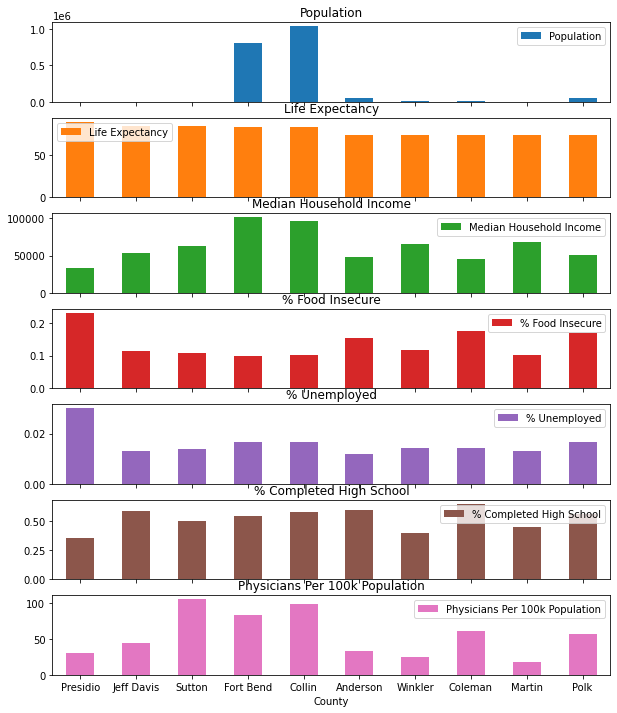

In [27]:
axes = trim_top_bottom_5_unf.plot.bar(rot=0, subplots=True, figsize=(10,12))
axes[1].legend(loc=2)

# Top 5 and Bottom 5 Counties DATA FRAME (County Pop > 10,000)

In [28]:
frames = [top5_county, bottom5_county]

top_bottom_5 = pd.concat(frames)

top_bottom_5.head(10)

,State,FIPS,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School,County Parameter
County,,,,,,,,,,,,,,,
Fort Bend,Texas,48157,811688,83.016215,81310,101361,677.0,13622,444200,0.100174,83.406432,0.000834,0.016782,0.547255,"Fort Bend County, Texas"
Collin,Texas,48085,1034730,82.675870,105240,96847,1019.0,17358,598877,0.101708,98.479797,0.000985,0.016775,0.578776,"Collin County, Texas"
Williamson,Texas,48491,590551,82.106826,58830,92661,396.0,8772,337578,0.099619,67.056021,0.000671,0.014854,0.571632,"Williamson County, Texas"
Denton,Texas,48121,887207,82.014735,92570,90910,464.0,14619,506374,0.104339,52.298956,0.000523,0.016478,0.570751,"Denton County, Texas"
Travis,Texas,48453,1273954,81.914037,155240,80690,1078.0,19047,753099,0.121857,84.618440,0.000846,0.014951,0.591151,"Travis County, Texas"
Anderson,Texas,48001,57735,73.305891,8800,48461,19.0,693,34222,0.152421,32.908981,0.000329,0.012003,0.592743,"Anderson County, Texas"
Polk,Texas,48373,51353,73.709509,8690,50416,29.0,852,28742,0.169221,56.471871,0.000565,0.016591,0.559695,"Polk County, Texas"
Potter,Texas,48375,117415,73.774648,19280,41138,89.0,1515,58289,0.164204,75.799515,0.000758,0.012903,0.496436,"Potter County, Texas"
Trinity,Texas,48455,14651,73.992110,2820,43788,2.0,253,8799,0.192478,13.650945,0.000137,0.017268,0.600573,"Trinity County, Texas"


In [29]:
trim_top_bottom_5 = top_bottom_5[['Median Household Income', '% Food Insecure', '% Unemployed', '% Completed High School', 'Physicians Per 100k Population']]

trim_top_bottom_5

,Median Household Income,% Food Insecure,% Unemployed,% Completed High School,Physicians Per 100k Population
County,,,,,
Fort Bend,101361,0.100174,0.016782,0.547255,83.406432
Collin,96847,0.101708,0.016775,0.578776,98.479797
Williamson,92661,0.099619,0.014854,0.571632,67.056021
Denton,90910,0.104339,0.016478,0.570751,52.298956
Travis,80690,0.121857,0.014951,0.591151,84.618440
Anderson,48461,0.152421,0.012003,0.592743,32.908981
Polk,50416,0.169221,0.016591,0.559695,56.471871
Potter,41138,0.164204,0.012903,0.496436,75.799515
Trinity,43788,0.192478,0.017268,0.600573,13.650945


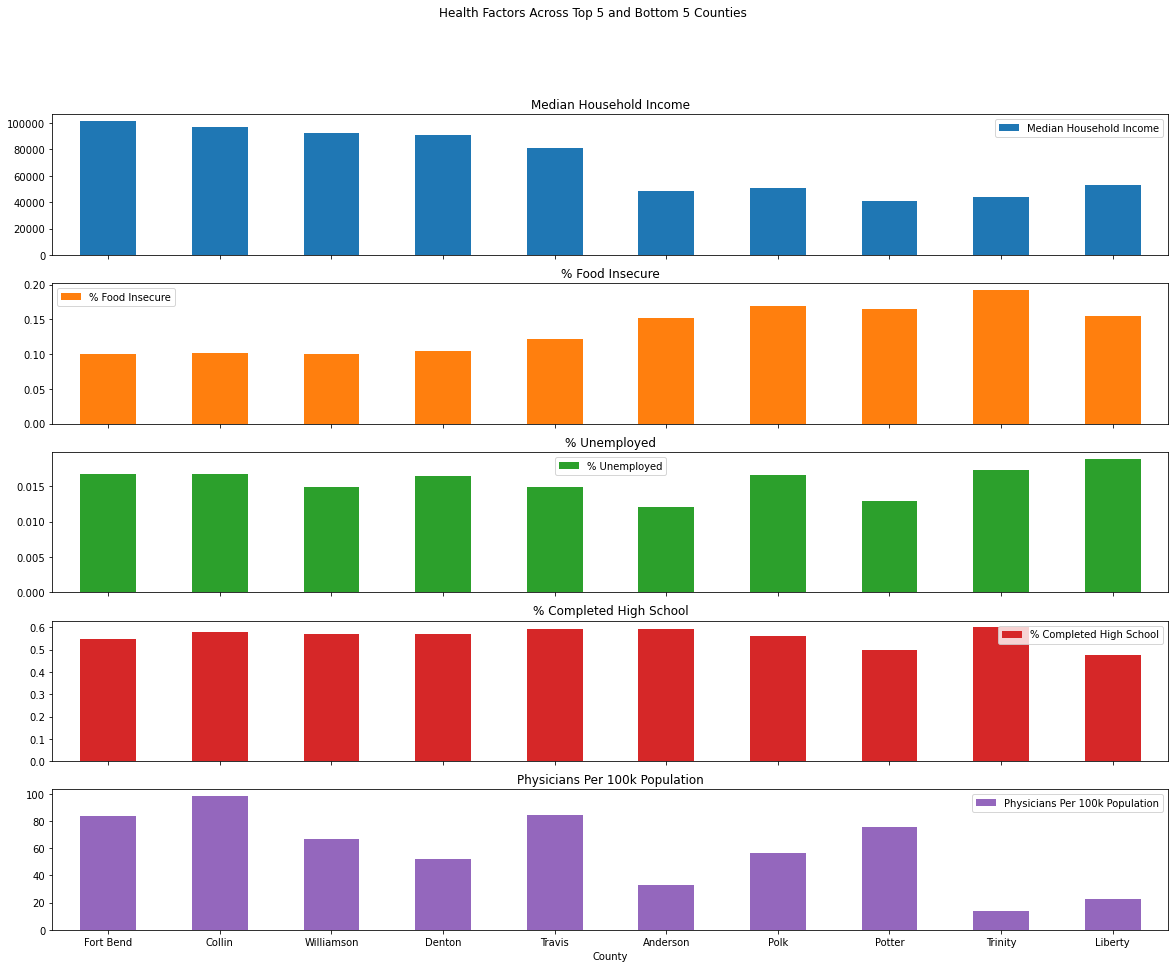

In [30]:
axes = trim_top_bottom_5.plot.bar(rot=0, subplots=True, figsize=(20,15), title="Health Factors Across Top 5 and Bottom 5 Counties")
axes[1].legend(loc=2)
plt.savefig("Health Factors for Top 5 and Bottom 5 Counties.png")


# Correlation Matrix

In [31]:
texas_corr = Final_DF.corr()
texas_corr.unstack().sort_values()
texas_corr.head(30)

,FIPS,Population,Life Expectancy,# Food Insecure,Median Household Income,# Primary Care Physicians,# Unemployed,# Completed High School,% Food Insecure,Physicians Per 100k Population,% Primary Care Physicians,% Unemployed,% Completed High School
FIPS,1.000000,-0.075369,-0.102443,-0.075339,-0.143484,-0.082891,-0.075580,-0.071904,0.151541,-0.057054,-0.057054,0.146639,-0.152303
Population,-0.075369,1.000000,0.354358,0.994779,0.234486,0.985180,0.994523,0.997829,-0.157238,0.296982,0.296982,0.108011,-0.056840
Life Expectancy,-0.102443,0.354358,1.000000,0.319163,0.536130,0.372389,0.343015,0.356328,-0.504040,0.319466,0.319466,-0.037506,-0.120641
# Food Insecure,-0.075339,0.994779,0.319163,1.000000,0.172527,0.971695,0.996091,0.987315,-0.107754,0.276155,0.276155,0.128139,-0.077045
Median Household Income,-0.143484,0.234486,0.536130,0.172527,1.000000,0.265363,0.203238,0.260316,-0.791629,0.330343,0.330343,-0.232936,0.266202
# Primary Care Physicians,-0.082891,0.985180,0.372389,0.971695,0.265363,1.000000,0.969715,0.988824,-0.175506,0.362758,0.362758,0.087719,-0.029212
# Unemployed,-0.075580,0.994523,0.343015,0.996091,0.203238,0.969715,1.000000,0.987834,-0.125469,0.273067,0.273067,0.147117,-0.075808
# Completed High School,-0.071904,0.997829,0.356328,0.987315,0.260316,0.988824,0.987834,1.000000,-0.173460,0.309011,0.309011,0.094554,-0.029331
% Food Insecure,0.151541,-0.157238,-0.504040,-0.107754,-0.791629,-0.175506,-0.125469,-0.173460,1.000000,-0.270139,-0.270139,0.492076,-0.080777
Physicians Per 100k Population,-0.057054,0.296982,0.319466,0.276155,0.330343,0.362758,0.273067,0.309011,-0.270139,1.000000,1.000000,-0.139799,0.133782


In [32]:
correlation = texas_corr.loc["Life Expectancy"]
correlation


FIPS                             -0.102443
Population                        0.354358
Life Expectancy                   1.000000
# Food Insecure                   0.319163
Median Household Income           0.536130
# Primary Care Physicians         0.372389
# Unemployed                      0.343015
# Completed High School           0.356328
% Food Insecure                  -0.504040
Physicians Per 100k Population    0.319466
% Primary Care Physicians         0.319466
% Unemployed                     -0.037506
% Completed High School          -0.120641
Name: Life Expectancy, dtype: float64

In [ ]:
# 1 Median Household Income - highest correlation to life expectancy
# 2 Food Insecure % - negative correlation. As food insecurity decreases, life expectancy increases
# 3 % Primary Care Physicians - As % of primary care physicians increases, life expectancy increases
# 4 % Unemployed - negative correlation. Not very strong. As unemployment decreases, life expectancy increases
# 5 % completed high school - negative correlation. This seems odd, as % completed high school increases, life expectancy decreases. 
#   this could mean that counties with younger populations (higher % of people under graduation have better life expectancy.


# API WORK (Google Maps)

In [33]:
#import key from config file
from config import gkey

ModuleNotFoundError: No module named 'config'

In [ ]:
#add Lat and Lng to the data frame for the top 5 counties
life_df = top5_county
life_df["Lat"] = ""
life_df["Lng"] = ""
life_df.head()

In [ ]:
# create a params dict that will be updated with new city each iteration
from config import gkey
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in life_df.iterrows():
    url = "https://maps.googleapis.com/maps/api/geocode/json"

    County = row['County Parameter']


    # update address key value
    params['address'] = f"{County}"

    # make request
    cities_lat_lng = requests.get(url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)

    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    life_df.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    life_df.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    
    time.sleep(.5)

In [ ]:
location = life_df["County Parameter"].tolist()
lifeexpectancy = life_df["Life Expectancy"].tolist()

In [ ]:
gmaps.configure(api_key=gkey)
marker_locations = life_df[['Lat','Lng']]
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations,
    info_box_content = [f"Location: {location}" for location in location])
fig.add_layer(markers)
fig

In [ ]:
#add Lat and Lng to the data frame for the bottom 5 counties
bot_life_df = bottom5_county
bot_life_df["Lat"] = ""
bot_life_df["Lng"] = ""
bot_life_df.head()

In [ ]:
# create a params dict that will be updated with new city each iteration
from config import gkey
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in bot_life_df.iterrows():
    url = "https://maps.googleapis.com/maps/api/geocode/json"

    County = row['County Parameter']


    # update address key value
    params['address'] = f"{County}"

    # make request
    cities_lat_lng = requests.get(url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)

    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    bot_life_df.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    bot_life_df.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    
    time.sleep(.5)

In [ ]:
location1 = bot_life_df["County Parameter"].tolist()
lifeexpectancy1 = bot_life_df["Life Expectancy"].tolist()

In [ ]:
gmaps.configure(api_key=gkey)
marker_locations = bot_life_df[['Lat','Lng']]
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations,
    info_box_content = [f"Location: {location1}" for location1 in location1])
fig.add_layer(markers)
fig

# API WORK (COVID ACT NOW)

In [ ]:
# Set params for top county that will be updated with each county iteration
API_df = life_df
API_df_response = []
API_df_websources = []
county = []
cases = []
deaths = []
vaccinated = []
fips = []

# Loop through top 5 data frame to retrieve FIPS
for fip in API_df["FIPS"]:
    fips.append(fip)
fips

In [ ]:
from config import apiKey
params = {"apiKey": key}
#actnowurl = f"https://api.covidactnow.org/v2/county/{fip}.json?apiKey={cKey}"
# Loop trough top 5 FIPS list
for fip in fips:
    # Make a request for each of the FIPS
    API_df_response = requests.get(f"https://api.covidactnow.org/v2/county/{fip}.json?apiKey={key}").json()

   
    # Append the url to the websources list
    API_df_websources.append(API_df_response["url"])
    # Append the Covid-19 statistics
    county.append(API_df_response["county"])
    cases.append(API_df_response["actuals"]["cases"])
    deaths.append(API_df_response["actuals"]["deaths"])
    vaccinated.append(API_df_response["metrics"]["vaccinationsInitiatedRatio"])



In [ ]:
# Create Data Frame to store Covid-19 Data
covidActNow_df = pd.DataFrame(county, columns = ['County'])
covidActNow_df["Cases"] = cases
covidActNow_df["Deaths"] = deaths
covidActNow_df[" % Vaccinated"] = vaccinated
covidActNow_df[" % Vaccinated"] = covidActNow_df[" % Vaccinated"].astype(float).map("{:.1%}".format)
#index = county
covidActNow_df = covidActNow_df.set_index('County')
# View Covid Statistics Data Frame
covidActNow_df.head()

In [ ]:
top_five_plot = plt.bar(county, vaccinated, color='c', alpha= 0.30, align="center")
top_five_plot = plt.xlabel("County")
top_five_plot = plt.ylabel("Population Vaccinated")
top_five_plot = plt.xticks(rotation = 90)
plt.show(vaccinated)
plt.savefig("Top 5 COVID-19 Vaccination %.png")

In [ ]:
# Set params for bottom county that will be updated with each county iteration
API_bottom_df = bot_life_df
API_bottom_df_response = []
API_bottom_df_websources = []
county = []
cases = []
deaths = []
vaccinated = []
fips = []

# Loop through bottom data frame to retrieve FIPS
for fip in API_bottom_df["FIPS"]:
    fips.append(fip)
fips

In [ ]:
from config import apiKey
params = {"apiKey": key}
#actnowurl = f"https://api.covidactnow.org/v2/county/{fip}.json?apiKey={cKey}"
# Loop trough bottom5 5 FIPS list
for fip in fips:
    # Make a request for each of the FIPS
    API_bottom_df_response = requests.get(f"https://api.covidactnow.org/v2/county/{fip}.json?apiKey={key}").json()

   
    # Append the url to the websources list
    API_bottom_df_websources.append(API_bottom_df_response["url"])
    # Append the Covid-19 statistics
    county.append(API_bottom_df_response["county"])
    cases.append(API_bottom_df_response["actuals"]["cases"])
    deaths.append(API_bottom_df_response["actuals"]["deaths"])
    vaccinated.append(API_bottom_df_response["metrics"]["vaccinationsInitiatedRatio"])

In [ ]:
# Create Data Frame to store Covid-19 Data
covidAct_df = pd.DataFrame(county, columns = ['County'])
covidAct_df["Cases"] = cases
covidAct_df["Deaths"] = deaths
covidAct_df[" % Vaccinated"] = vaccinated
covidAct_df[" % Vaccinated"] = covidAct_df[" % Vaccinated"].astype(float).map("{:.1%}".format)
#index = county
covidAct_df = covidAct_df.set_index('County')
# View Covid Statistics Data Frame
covidAct_df.head()

In [ ]:
vaccinated_plot = plt.bar(county, vaccinated, color='c', alpha= 0.30, align="center")
vaccinated_plot = plt.xlabel("County")
vaccinated_plot = plt.ylabel("Population Vaccinated")
vaccinated_plot = plt.xticks(rotation = 90)
plt.show(vaccinated)
plt.savefig("Bottom 5 COVID-19 Vaccination %.png")

In [ ]:
# Retrieve websources
print(API_df_websources)
# View Websources
import webbrowser
new = 2
for web in API_df_websources:
    webbrowser.open(web, new=new)
print("View Covid Act Now Data on The Web!")